Analyse how our approximation

\begin{equation}
    \text{tr} \left( K^{-1} \frac{dK}{d\theta} \right) \approx \frac{1}{S} \sum_{i=1}^S z_i^T C^{-1} \frac{dK}{d\theta} z_i; \quad z_i \sim N(0, I)
\end{equation}
converges as S increases.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from lazy_GP import GP
%matplotlib inline
gp = GP()

Generate some input data (we don't need targets for this analysis)

In [2]:
np.random.seed(42)
N = 100
D = 2
X = np.random.uniform(-3, 3, (N, D))
sigma = 0.001

Parameters and index of $\theta$ with respect to which we're evaluating the derivative

In [3]:
theta = np.array([1., 1.])
d_dash = 0

Long-winded way of finding $K$, $C^{-1}$ and $dK/d\theta_{d'}$

In [4]:
K = np.ones([N, N])
dK_dtheta = np.zeros([N, N])
for i in range(N):
    for j in range(N):
        dK_dtheta[i, j] = theta[d_dash]**-3
        for d in range(D):
            K[i, j] *= np.exp(-0.5 * (X[i, d] - X[j, d])**2)
            dK_dtheta[i, j] *= np.exp(-0.5 * (X[i, d] - X[j, d])**2)
        dK_dtheta[i, j] *= (X[i, d_dash] - X[j, d_dash])**2
C = K + np.eye(N) * sigma**2
inv_C = np.linalg.inv(C)

Calculate our estimate of the trace term for increasing $S$

In [5]:
S_list = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
tr_terms = []
for S in S_list:
    tr_terms.append(gp._tr_invK_dK(X, theta, sigma, d_dash, S))

Long-winded caluclation of trace term

In [6]:
tr_term_test = np.trace(inv_C @ dK_dtheta)

Plot of convergence

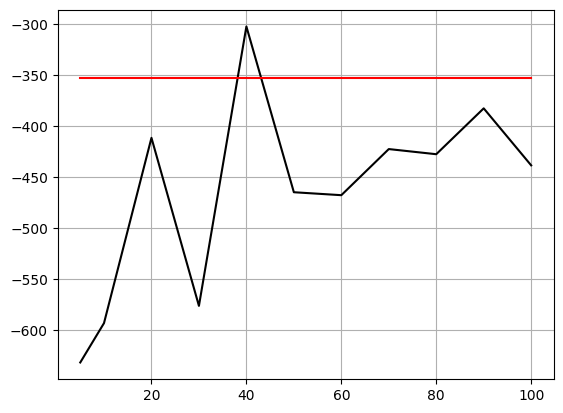

In [7]:
fig, ax = plt.subplots()
ax.plot(S_list, tr_terms, label='Exact', color='black')
ax.plot(S_list, np.repeat(tr_term_test, len(S_list)), label='Approximation', color='red')
ax.grid()